#Baseline Model

In [ ]:
!pip install torchvision

In [ ]:
!pip install torchmetrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

# !pip install torchvision
import torchvision

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# !pip install torchmetrics
import torchmetrics

In [ ]:
batch_size = 60

train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

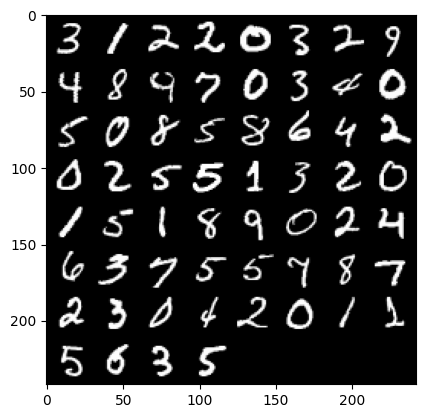

In [ ]:
def imshow(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels
# show images
imshow(torchvision.utils.make_grid(images))


In [ ]:
class CNN(nn.Module):
   def __init__(self, in_channels, num_classes):

       """
       Building blocks of convolutional neural network.

       Parameters:
           * in_channels: Number of channels in the input image (for grayscale images, 1)
           * num_classes: Number of classes to predict. In our problem, 10 (i.e digits from  0 to 9).
       """
       super(CNN, self).__init__()

       # 1st convolutional layer
       self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1)
       # Max pooling layer
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
       # 2nd convolutional layer
       self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
       # Fully connected layer
       self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

   def forward(self, x):
       """
       Define the forward pass of the neural network.

       Parameters:
           x: Input tensor.

       Returns:
           torch.Tensor
               The output tensor after passing through the network.
       """
       x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(in_channels=1, num_classes=10).to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
device = next(model.parameters()).device  # Automatically get the device model is on

In [ ]:
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs=10
for epoch in range(num_epochs):
 # Iterate over training batches
   print(f"Epoch [{epoch + 1}/{num_epochs}]")

   for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
       data = data.to(device)
       targets = targets.to(device)
       scores = model(data)
       loss = criterion(scores, targets)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

Epoch [1/10]


100%|██████████| 1000/1000 [00:08<00:00, 112.31it/s]


Epoch [2/10]


100%|██████████| 1000/1000 [00:07<00:00, 131.74it/s]


Epoch [3/10]


100%|██████████| 1000/1000 [00:08<00:00, 122.58it/s]


Epoch [4/10]


100%|██████████| 1000/1000 [00:08<00:00, 114.96it/s]


Epoch [5/10]


100%|██████████| 1000/1000 [00:07<00:00, 127.32it/s]


Epoch [6/10]


100%|██████████| 1000/1000 [00:08<00:00, 123.51it/s]


Epoch [7/10]


100%|██████████| 1000/1000 [00:08<00:00, 122.90it/s]


Epoch [8/10]


100%|██████████| 1000/1000 [00:07<00:00, 132.88it/s]


Epoch [9/10]


100%|██████████| 1000/1000 [00:08<00:00, 121.77it/s]


Epoch [10/10]


100%|██████████| 1000/1000 [00:08<00:00, 121.30it/s]


In [ ]:
from torchmetrics.classification import Accuracy

acc = Accuracy(task="multiclass", num_classes=10).to(device)
acc.reset()

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        acc.update(preds, labels)

test_accuracy = acc.compute()
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.9870


#LeNet-5

In [ ]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 30.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

# !pip install torchvision
import torchvision

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# !pip install torchmetrics
import torchmetrics

In [ ]:
batch_size = 60
transform = transforms.Compose([
    transforms.Pad(2),          # Pads 28×28 to 32×32
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.82MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.7MB/s]


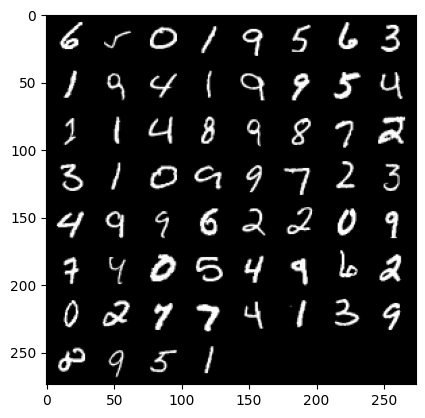

In [ ]:
def imshow(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels
# show images
imshow(torchvision.utils.make_grid(images))


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)       # Input: 1x32x32 → Output: 6x28x28
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2) # Output: 6x14x14 → then 16x5x5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)      # Output: 16x10x10
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # ReLU instead of tanh
        x = self.pool(x)
        x = F.relu(self.conv2(x))  # ReLU instead of tanh
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))    # ReLU instead of tanh
        x = F.relu(self.fc2(x))    # ReLU instead of tanh
        x = self.fc3(x)
        return x


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = LeNet5().to(device)
print(model)


LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
device = next(model.parameters()).device  # Automatically get the device model is on

In [ ]:
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs=10
for epoch in range(num_epochs):
 # Iterate over training batches
   print(f"Epoch [{epoch + 1}/{num_epochs}]")

   for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
       data = data.to(device)
       targets = targets.to(device)
       scores = model(data)
       loss = criterion(scores, targets)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

Epoch [1/10]


100%|██████████| 1000/1000 [00:10<00:00, 93.21it/s]


Epoch [2/10]


100%|██████████| 1000/1000 [00:10<00:00, 96.69it/s]


Epoch [3/10]


100%|██████████| 1000/1000 [00:10<00:00, 91.75it/s]


Epoch [4/10]


100%|██████████| 1000/1000 [00:10<00:00, 96.19it/s] 


Epoch [5/10]


100%|██████████| 1000/1000 [00:10<00:00, 97.61it/s]


Epoch [6/10]


100%|██████████| 1000/1000 [00:10<00:00, 96.10it/s] 


Epoch [7/10]


100%|██████████| 1000/1000 [00:10<00:00, 95.47it/s]


Epoch [8/10]


100%|██████████| 1000/1000 [00:10<00:00, 91.92it/s]


Epoch [9/10]


100%|██████████| 1000/1000 [00:09<00:00, 103.33it/s]


Epoch [10/10]


100%|██████████| 1000/1000 [00:10<00:00, 96.70it/s]


In [ ]:
from torchmetrics.classification import Accuracy

acc = Accuracy(task="multiclass", num_classes=10).to(device)
acc.reset()

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        acc.update(preds, labels)

test_accuracy = acc.compute()
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.9871


#Architecture from the book
With dropout

In [1]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 21.9 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

# !pip install torchvision
import torchvision

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# !pip install torchmetrics
import torchmetrics

In [6]:
batch_size = 60

train_dataset = datasets.MNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.93MB/s]


In [ ]:
def imshow(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels
# show images
imshow(torchvision.utils.make_grid(images))


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        # Conv1: input 1x28x28 → output 20x24x24 → pool → 20x12x12
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Conv2: input 20x12x12 → output 40x8x8 → pool → 40x4x4
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=40, kernel_size=5)

        # Fully connected layers
        self.fc1 = nn.Linear(40 * 4 * 4, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 10)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # Conv + Pool + ReLU
        x = self.pool(F.relu(self.conv1(x)))  # → 20x12x12
        x = self.pool(F.relu(self.conv2(x)))  # → 40x4x4

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers with ReLU + Dropout
        x = self.dropout(F.relu(self.fc1(x)))  # → 1000
        x = self.dropout(F.relu(self.fc2(x)))  # → 1000
        x = self.dropout(self.fc3(x))          # → 10 (logits)

        return x


In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = DeepCNN().to(device)
print(model)


DeepCNN(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 40, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=640, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [10]:
device = next(model.parameters()).device  # Automatically get the device model is on

In [11]:
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs=10
for epoch in range(num_epochs):
 # Iterate over training batches
   print(f"Epoch [{epoch + 1}/{num_epochs}]")

   for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
       data = data.to(device)
       targets = targets.to(device)
       scores = model(data)
       loss = criterion(scores, targets)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

Epoch [1/10]


100%|██████████| 1000/1000 [00:09<00:00, 106.89it/s]


Epoch [2/10]


100%|██████████| 1000/1000 [00:09<00:00, 106.74it/s]


Epoch [3/10]


100%|██████████| 1000/1000 [00:08<00:00, 114.03it/s]


Epoch [4/10]


100%|██████████| 1000/1000 [00:08<00:00, 114.97it/s]


Epoch [5/10]


100%|██████████| 1000/1000 [00:08<00:00, 123.34it/s]


Epoch [6/10]


100%|██████████| 1000/1000 [00:08<00:00, 114.43it/s]


Epoch [7/10]


100%|██████████| 1000/1000 [00:08<00:00, 112.60it/s]


Epoch [8/10]


100%|██████████| 1000/1000 [00:08<00:00, 119.23it/s]


Epoch [9/10]


100%|██████████| 1000/1000 [00:08<00:00, 118.17it/s]


Epoch [10/10]


100%|██████████| 1000/1000 [00:08<00:00, 114.51it/s]


In [12]:
from torchmetrics.classification import Accuracy

acc = Accuracy(task="multiclass", num_classes=10).to(device)
acc.reset()

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        acc.update(preds, labels)

test_accuracy = acc.compute()
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.9921
